# Predicting the Acceptance or Rejection of Personal Loans using Machine Learning Classification Algorithms. 

# Introduction 

The dataset pertains to a fictitious bank that has a growing customer base. The bank desires to expand its loan business and subsequently earn interest on the loans. In particular, the management seeks to target its liability customers (depositors) to purchase their personal loans. The bank ran a campaign last year, and the liability customers showed a healthy conversion rate of over 9% success. To reduce the cost of the campaign, the bank's marketing department wants to target their liability customers with a minimal budget cost. The bank's marketing department is interested in knowing how a machine learning algorithm or model can better predict a higher probability of purchasing the loan.

# Objective 

The objective of this project is to predict whether customers will purchase the personal loan or not, and which machine learning algorithm will provide the best accuracy.

# Motivation

My motivation for pursuing this project is to learn how machine learning algorithms can be useful in financial institutions. 

# Data source

The data source used in this project is Kaggle. The URL of the dataset is below:
https://www.kaggle.com/itsmesunil/bank-loan-modelling.

# Load all of the essential libraries.

In [1]:
# Import all of the essential libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

In [2]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

# Dataset Loaded into Jupyter Notebook Utilizing an Excel File:

In [3]:
# Create a data frame called credit.
credit = pd.read_excel('Bank.xlsx', sheet_name= 'Data')

In [4]:
# To get the first 10 rows, use the head() function.
credit.head(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [5]:
# To explore the variables in the data set, use the info() function.
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# To examine the mean, standard deviation, min, 25th percentile, 50th percentile, 75th percentile, 
# and max values, use the describe and transpose () functions.
credit.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937913     1.747666     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [7]:
# View a dataset's dimensions.
credit.shape

(5000, 14)

# Feature Engineering

Feature engineering was performed to detect outliers, na values, and null values in the dataset. Data tidying performed to get a better performance from the model. 

In [8]:
# Drop non-essential features like ID and ZIP Code from the dataset using the drop() function.
credit1 = credit.drop(['ID','ZIP Code'],axis = 1)

# To extract the first 5 rows of the credit1 dataset, use the head() function.
credit1.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

After the unnecessary features such as ID and ZIP Code, the remaining data features are shown above in the data table.

In [9]:
# View the dataset's new dimension.
credit1.shape

(5000, 12)

The new dimensiion of the dataset is 5000 * 12. 

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

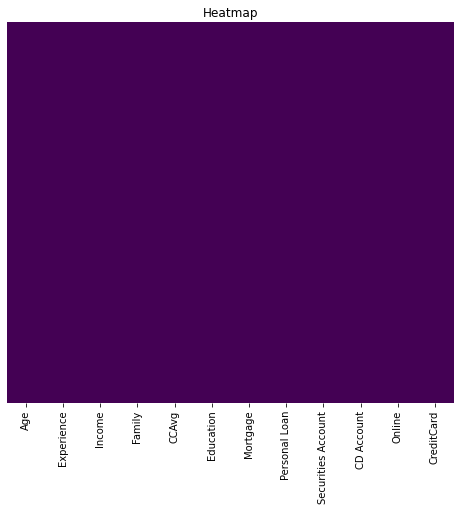

In [10]:
# Look for null values in the data set. Display the null values on the heatmap if any.
plt.figure(figsize = (8,7))
sns.heatmap(credit1.isnull(),yticklabels  = False, cbar = False, cmap = 'viridis')
plt.title('Heatmap')
credit1.isnull().sum()

There are no null values in the dataset, as can be seen in heatmap above.

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

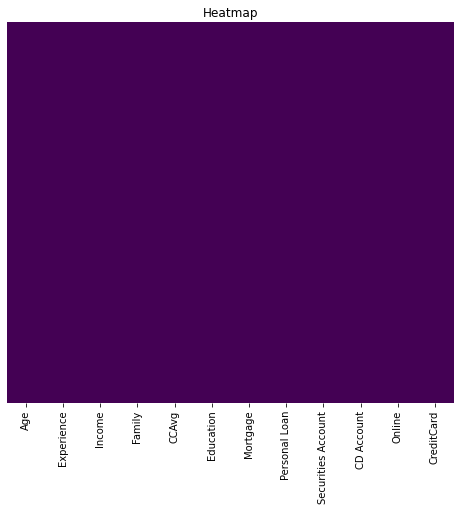

In [11]:
# Look for na values in the data set. Display the na values on the heatmap if any.
plt.figure(figsize = (8,7))
sns.heatmap(credit1.isna(),yticklabels  = False, cbar = False, cmap = 'viridis')
plt.title('Heatmap')
credit1.isna().sum()

There are no na values in the dataset, as evidenced by the heatmap above.

In [12]:
# To discover outliers and exclude them from the original dataset, 
# use an interquartile range (IQR) approach.

# Extract credit1 continuous features such as Income, CCAvg, Mortgage, age, and experience.
cols = credit1[["Income", "CCAvg","Mortgage","Age","Experience"]]

# Detect outliers using an interquartile range (IQR) approach.
Q1 = np.percentile(cols,25, interpolation= 'midpoint')
Q3 = np.percentile(cols,75, interpolation= 'midpoint')

# Create an IQR variable that takes the difference between the third and first quartiles.
IQR = Q3 - Q1

# Print the original dataset shape.
print("Original Credit dataset shape:",credit1.shape)

# Define a variable called Upper bound.
Upper = cols >= (Q3 + 1.5 * IQR)
# # Define a variable called Lower bound.
Lower = cols <= (Q1 - 1.5 * IQR)


# Exclude the potential outliers from the dataset. Give a name credit2 to the dataframe.
credit2 = credit1[~(Upper | Lower).any(axis=1)]

# The complement operator, the tilde operator, is utilized.
print("New Credit dataset shape:", credit2.shape)

Original Credit dataset shape: (5000, 12)
New Credit dataset shape: (3477, 12)


After removing outliers from the original dataset, 3477 observations and 12 features were obtained.

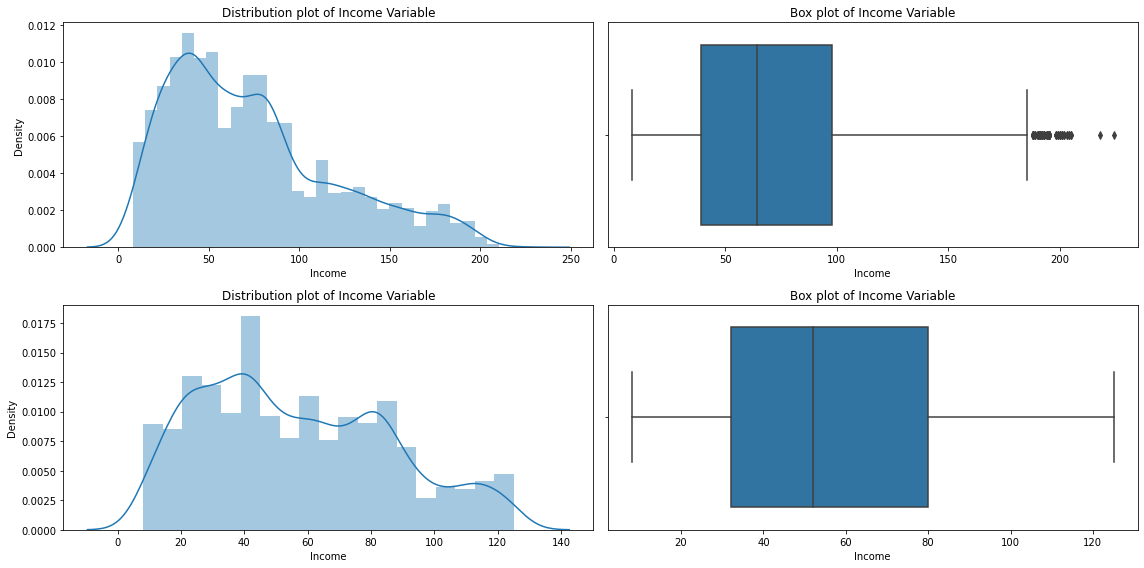

In [13]:
# To ignore the warning, use the filterwarnings() function.
warnings.filterwarnings('ignore')

# Visualize the distribution in the subplots to see the before and 
# after picture of the Income variable in particular.
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(credit1['Income'])
plt.title('Distribution plot of Income Variable')

plt.subplot(2,2,2)
sns.boxplot(credit1['Income'])
plt.title('Box plot of Income Variable')

plt.subplot(2,2,3)
sns.distplot(credit2['Income'])
plt.title('Distribution plot of Income Variable')

plt.subplot(2,2,4)
sns.boxplot(credit2['Income'])

plt.title('Box plot of Income Variable')
plt.tight_layout() 

The distribution and box plot of an Income variable have significantly improved. As a result, it can assist in improving the performance of machine learning models.

In [14]:
# To display statistical values, use the describe and transpose functions.
credit2.describe().transpose()

count       mean        std   min   25%   50%   75%  \
Age                 3477.0  45.509060  11.454379  23.0  35.0  46.0  55.0   
Experience          3477.0  20.226632  11.479098  -3.0  10.0  20.0  30.0   
Income              3477.0  56.237274  29.936561   8.0  32.0  52.0  80.0   
Family              3477.0   2.475410   1.163695   1.0   1.0   2.0   4.0   
CCAvg               3477.0   1.484920   1.172683   0.0   0.5   1.3   2.1   
Education           3477.0   1.947944   0.829126   1.0   1.0   2.0   3.0   
Mortgage            3477.0  15.720161  36.964702   0.0   0.0   0.0   0.0   
Personal Loan       3477.0   0.031924   0.175823   0.0   0.0   0.0   0.0   
Securities Account  3477.0   0.106414   0.308411   0.0   0.0   0.0   0.0   
CD Account          3477.0   0.038539   0.192521   0.0   0.0   0.0   0.0   
Online              3477.0   0.599080   0.490155   0.0   0.0   1.0   1.0   
CreditCard          3477.0   0.295657   0.456403   0.0   0.0   0.0   1.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              125.0  
Family                4.0  
CCAvg                 8.0  
Education             3.0  
Mortgage            127.0  
Personal Loan         1.0  
Securities Account    1.0  
CD Account            1.0  
Online                1.0  
CreditCard            1.0

After excluding outliers, the statistical values of all variables drastically improved.

Credit Shape without Outliers: (3477, 12)
Credit Shape with Outliers: (1523, 12)


Text(0.5, 1.0, 'Heatmap without Outliers')

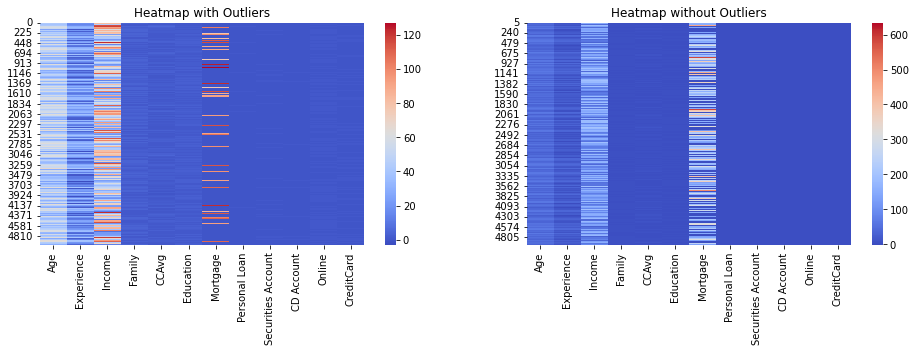

In [15]:
# Show an Outliers on the heatmap. 
plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
nn1 = credit1[~(Upper | Lower).any(axis=1)]
sns.heatmap(nn1, cmap = 'coolwarm')
plt.title("Heatmap with Outliers")

plt.subplot(2,2,2)
nn2 = credit1[(Upper | Lower).any(axis=1)]
sns.heatmap(nn2, cmap = 'coolwarm')
print('Credit Shape without Outliers:',nn1.shape)
print('Credit Shape with Outliers:',nn2.shape)
plt.title("Heatmap without Outliers")

The heatmaps show the true picture of the dataset with or without outliers.

# Exploratory Data Analysis (EDA)

I explored the data using advanced visualization libraries such as seaborn, matplotlib, plotly, cufflinks, and plotlyexpress. This section gives a through tour about the features in the dataset.

<Figure size 1440x1080 with 0 Axes>

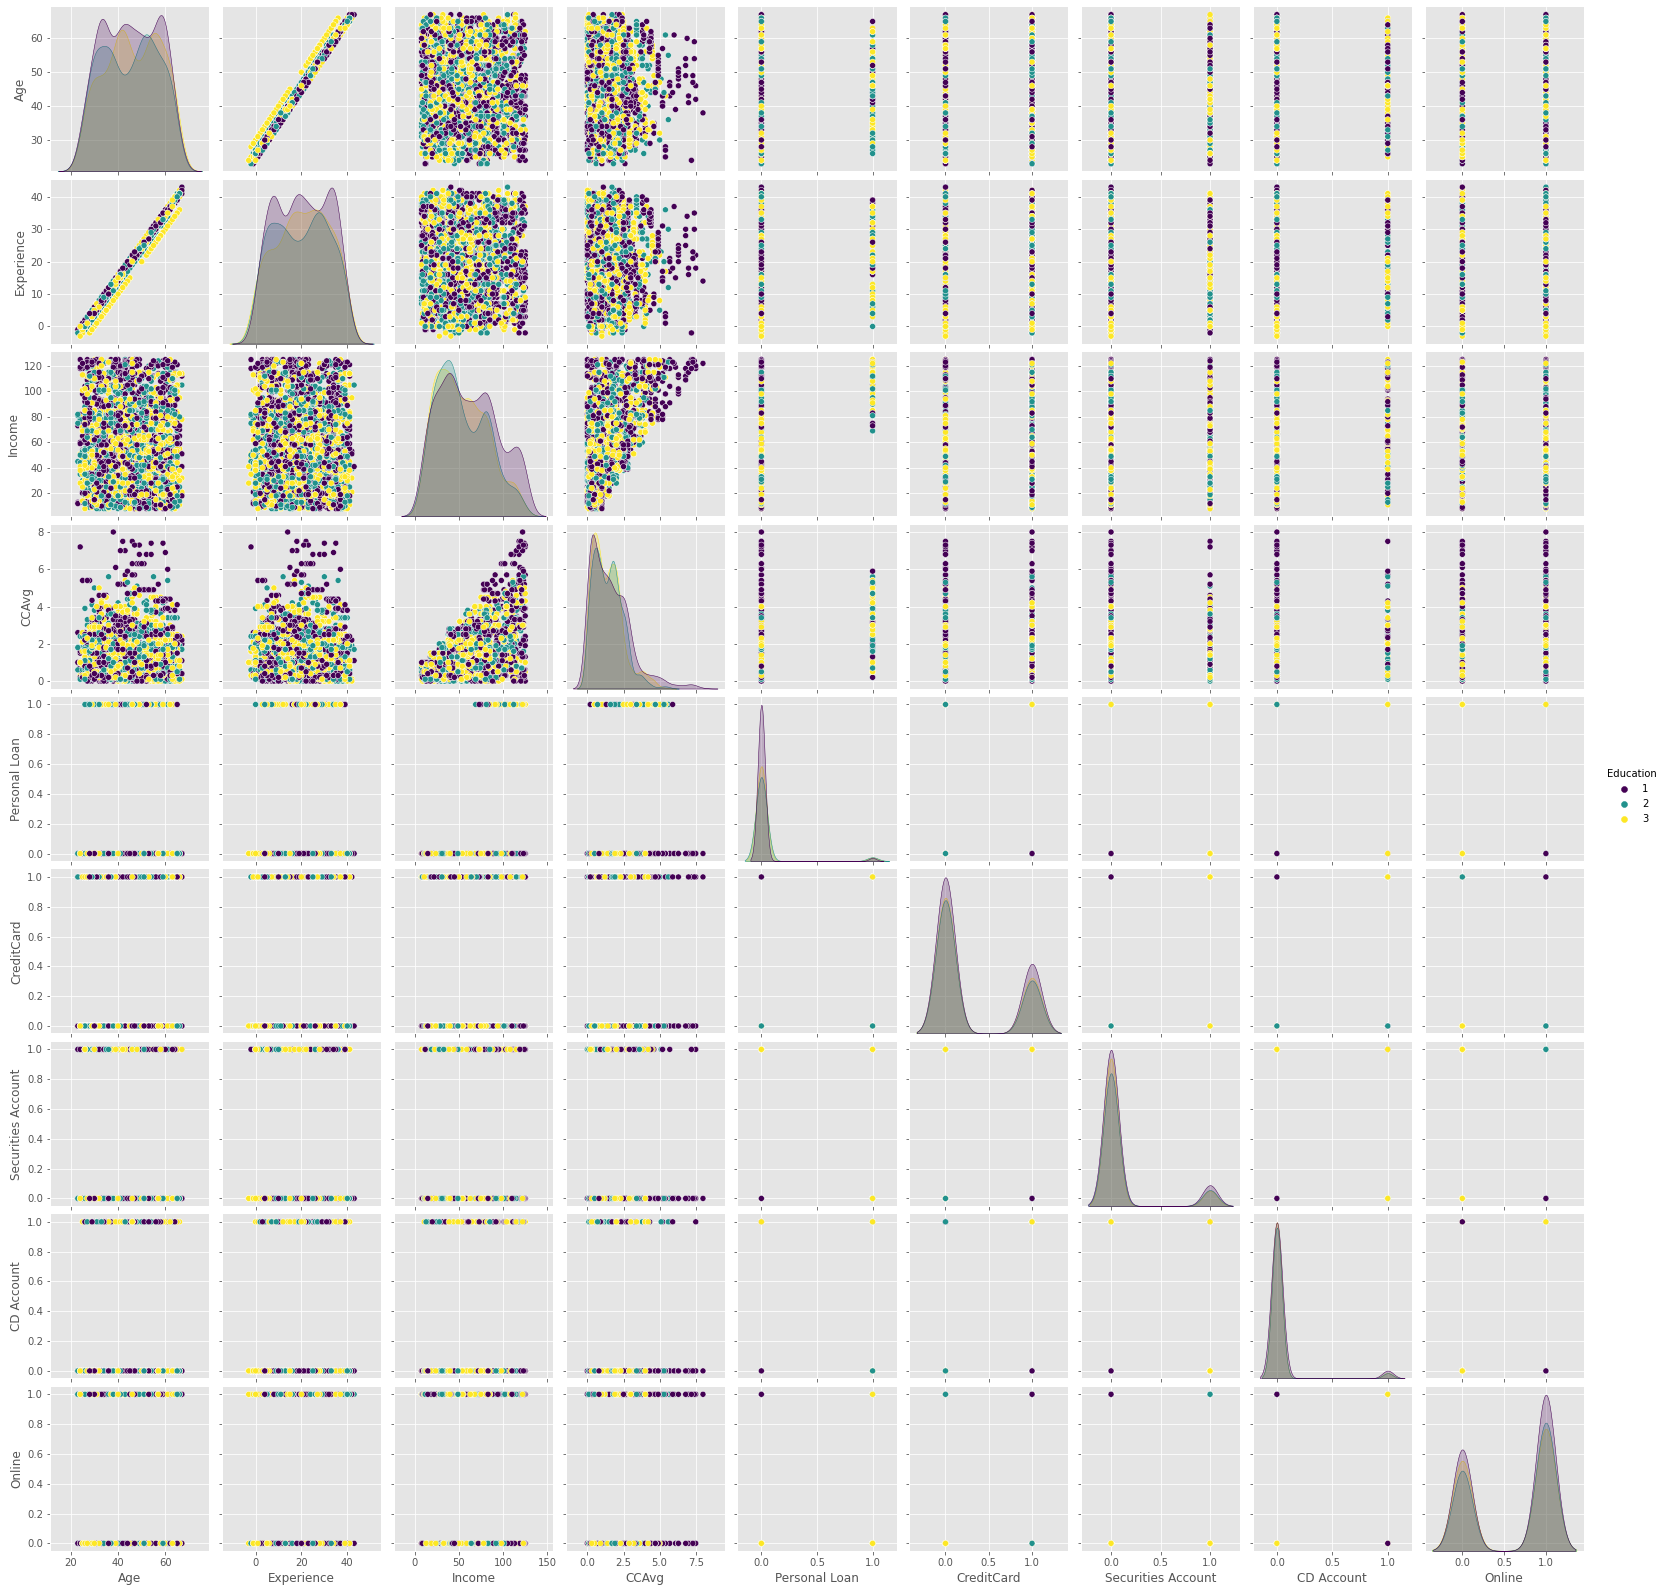

<Figure size 432x288 with 0 Axes>

In [16]:
# To visualize the significant variables, use the pair plot()function.
plt.style.use('ggplot')
plt.figure(figsize=(20,15))
sns.pairplot(credit2, hue = 'Education', palette = 'viridis', 
              vars = ('Age','Experience','Income','CCAvg', 
                                   'Personal Loan','CreditCard',
                      'Securities Account',
                      'CD Account','Online'))
plt.show()
plt.tight_layout() 

The true depiction of the significant variables can be seen using a pair plot. It also shows how variables are related to each other. Furthermore, the color of the data points indicates the type of education.

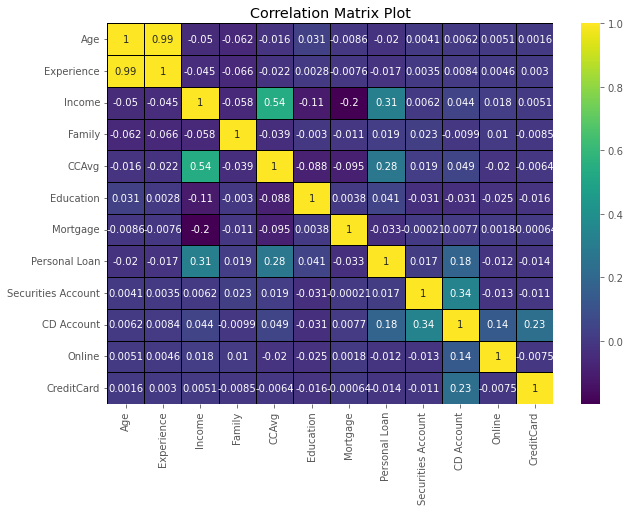

In [17]:
# Create a plot of a correlation matrix.
plt.figure(figsize = (10,7))

# Create a variable called cc to calculate correlation.
cc = credit2.corr()

# To visualize the correlation matrix, use a heatmap.
cc1 = sns.heatmap(cc,cmap = 'viridis', 
                  linecolor = 'black', linewidths = 1, 
                  annot = True).axes.set_title("Correlation Matrix Plot")
cc1
plt.show()

The correlation matrix plot shows whether there is a true positive or negative relationship between variables. It is an accurate description of the relationships between variables. In practice, it's an extensively utilized statistical tool.

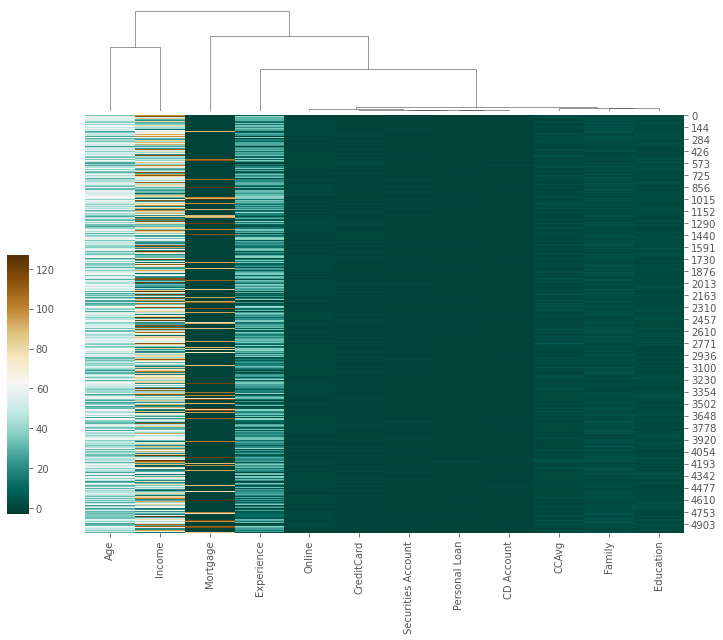

In [18]:
# Using the seaborn library, visualize a hierarchical-clustermap.
sns.clustermap(credit2, cmap = "BrBG_r",figsize=(10, 9),
                   row_cluster=False,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .2, .03, .4))

The dendrograms on the top of the x-axis are shown in a hierarchical-clustering map. They demonstrate a similarity among the variables. A color bar scale is used to indicate the values of each variable.

Text(0, 0.5, 'Average spending on credit cards per month')

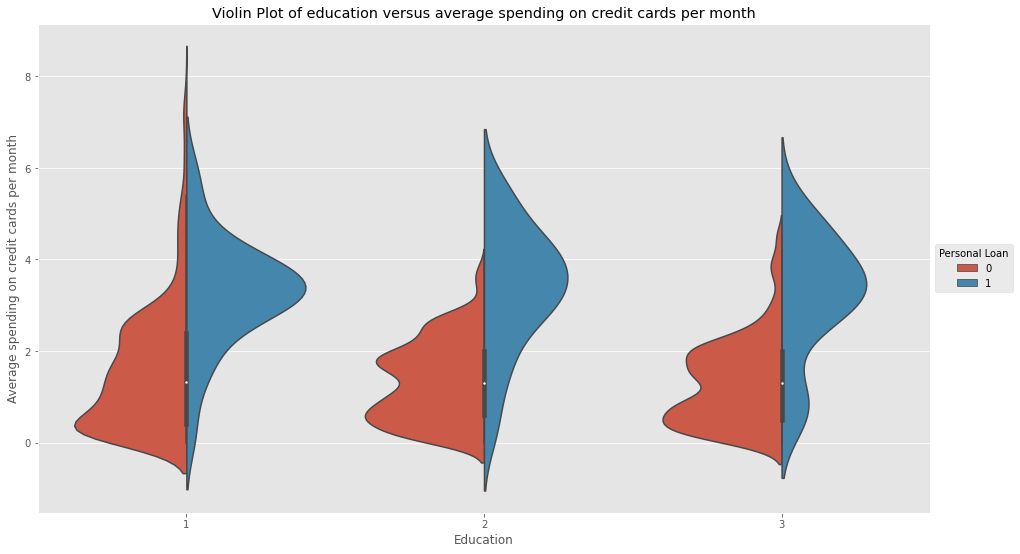

In [19]:
# Show a violin plot of education versus average credit card spending, 
# with data points segregated by personal loan.
plt.style.use('ggplot')
plt.figure(figsize = (16,9))
sns.violinplot(x = 'Education', y = 'CCAvg' , 
               data = credit2, hue = 'Personal Loan', 
               split = True)

# Show a legend on the right-hand side of the plot.
plt.legend(loc = "center left", bbox_to_anchor = (1,0.5), 
           title = 'Personal Loan')
plt.title("Violin Plot of education versus average spending on credit cards per month")
plt.ylabel("Average spending on credit cards per month")

The violin plot indicates the kernel density estimation of the underlying distribution. Moreover, it depicts more information than a box plot. It also demonstrates the median of the average spending of the customers on a credit card per month.

In [20]:
# Using the plotly express library, create an interactive box plot.
plt.style.use('ggplot')
plt.figure(figsize = (14,7))

# Show an Interactive box plot.
fig = px.box(credit2, x = 'Family', y = 'Income', points = 'all', 
             color = "Personal Loan", title = "Box Plot")
fig.update_traces(quartilemethod="inclusive")
fig.show()

<Figure size 1008x504 with 0 Axes>

Data points are distinguished and displayed by personal loan type alongside a box whisker plot in a box plot created with the plotly express library. Furthermore, the data points are categorized by size of family. Customers who accepted a personal loan based on the highest median value belonged to a family with two members.

Text(0.5, 1.0, 'Distribution Plot of Income')

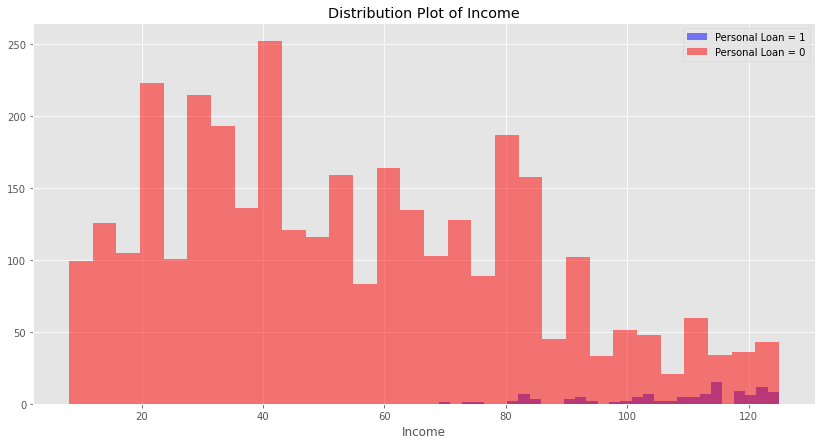

In [21]:
# Filter an income variable and create a distinct income distribution plot.
plt.style.use('ggplot')
plt.figure(figsize=(14,7))

# Construct distribution plots.
credit2[credit2['Personal Loan'] == 1]['Income'].hist(bins = 30, alpha = 0.5, 
                                color = 'blue', label = 'Personal Loan = 1')

credit2[credit2['Personal Loan'] == 0]['Income'].hist(bins = 30, alpha = 0.5, 
                                color = 'red', label = 'Personal Loan = 0')

plt.legend()
plt.xlabel('Income')
plt.title( 'Distribution Plot of Income')

After filtering the type of personal loan, the underlying distribution of customers who accepted the loan is much smaller than the underlying distribution of customers who did not accept the loan, as shown in the distribution plot.

Text(0.5, 1, 'Marginal Histogram of Income versus CCAvg')

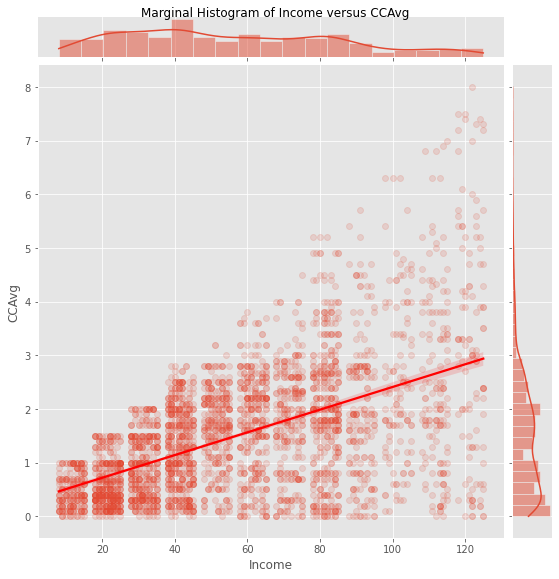

In [22]:
# Joint plot/ Marginal histogram
plt.style.use('ggplot')
sns.jointplot(x = 'Income',y = 'CCAvg' , data = credit2, 
              kind = 'reg',scatter_kws={'alpha':0.15}, line_kws={'color': 'red'}, 
              height = 8, ratio = 10, dropna= True)

# Show a title of the marginal histogram.
plt.suptitle("Marginal Histogram of Income versus CCAvg", y =1)

The underlying distribution and kernel density estimation are shown in a marginal histogram. Furthermore, it depicts a scatter plot with a positive linear relationship. As a result, higher-income corresponds to higher monthly credit card expenditure.

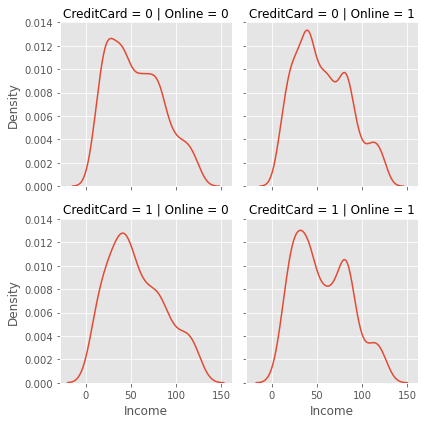

In [23]:
# Using faceting, the ggplot grid style, visualize the kernel density estimate plot.
plt.style.use('ggplot')
# Facet grid
f = sns.FacetGrid(data = credit2, col = "Online" , row = "CreditCard")
f.map(sns.kdeplot, "Income")
plt.show()

A facet grid is another way to glance at the data. I utilized the facet grid to display more information about customers who owned a credit card, used internet banking, and had a sufficient income. The customer's income is represented on the x-axis. On the other hand,  the kernel density estimation (KDE) presents a smooth density plot where all the specified conditions were satisfied.

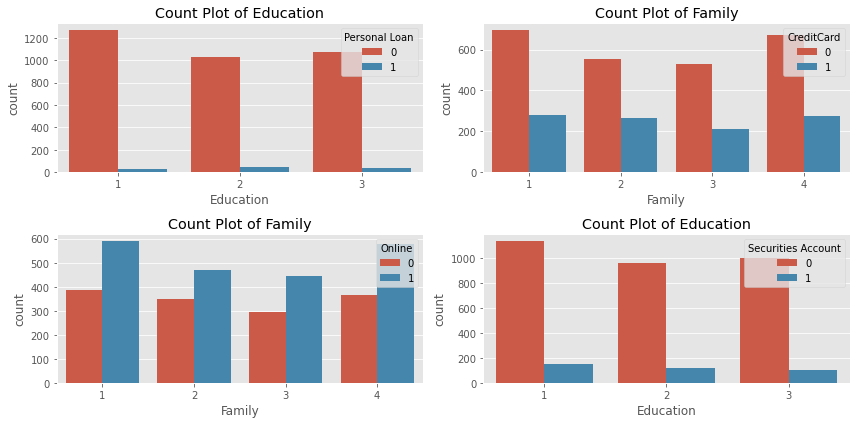

In [24]:
# Visualize a count plot of education that is colored by the type of personal loan.
plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
sns.countplot(x ='Education' ,hue = 'Personal Loan', data = credit2)
plt.title("Count Plot of Education", loc = "center")
plt.tight_layout()


# VVisualize a count plot of family that is colored by the credit card issued by universal bank.
plt.subplot(2,2,2)
sns.countplot(x ='Family' ,hue = 'CreditCard', data = credit2)
plt.title("Count Plot of Family", loc = "center")
plt.tight_layout()


# Visualize a count plot of education that is colored by an online banking.
plt.subplot(2,2,3)
sns.countplot(x ='Family' ,hue = 'Online', data = credit2)
plt.title("Count Plot of Family", loc = "center")
plt.tight_layout()


# Visualize a count plot of education that is colored by the securities account.
plt.subplot(2,2,4)
sns.countplot(x ='Education' ,hue = 'Securities Account', data = credit2)
plt.title("Count Plot of Education", loc = "center")
plt.tight_layout()


The count plot is a powerful statistical tool for exploring the bulk of data in terms of data exploration. Using count plots, I was able to see the differences between several variables. The count plots did a good job of describing it.  It can also be read by someone who isn't a statistician. As a result, the count plots showed me a quick overview of the key variables in the dataset.

The following supervised machine learning algorithms are used in this project:
Logistic Regression, K-nearest neighbors (KNN), decision tree, random forest, support vector machine (SVM), and artificial neural network (ANN).

# 1. Logistic Regression 

In [25]:
# Define the variables X and y.
X = credit2.drop('Personal Loan', axis = 1)
y = credit2['Personal Loan']

In [26]:
# Import a library called train_test_split from scikit learn.
from sklearn.model_selection import train_test_split

In [27]:
# Split 30% of the data to the test data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=0.3, random_state=101)

In [28]:
# Import LogisticRegression from scikit learn linear family.
from sklearn.linear_model import LogisticRegression

In [29]:
# Define an instance of LogisticRegression called logmodel.
logmodel = LogisticRegression()

In [30]:
# Fit a training data to the logistic model.
logmodel.fit(X_train,y_train )

LogisticRegression()

In [31]:
# Predict the logistic model. Give a name predictions to the variable.
predictions = logmodel.predict(X_test)

In [32]:
# Import an evaluation metrics from scikit learn metrics.
from sklearn.metrics import classification_report,confusion_matrix

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1012
           1       0.69      0.34      0.46        32

    accuracy                           0.98      1044
   macro avg       0.83      0.67      0.72      1044
weighted avg       0.97      0.98      0.97      1044





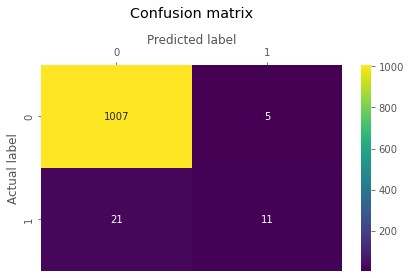

In [33]:
# Show a report on evaluation metrics.
print(classification_report(y_test, predictions))
print('\n')

# Show a confusion matrix on a heatmap.
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")

plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

The classification evaluation report and the confusion matrix demonstrated the logistic model's remarkable performance. The classification report included four key evaluation metrics: precision, recall, f1-score, and accuracy, some of which indicated that the overall outcome was impressive. The confusion matrix also Indicates the number of false positives (FP), false negatives (FN), total positives (TP), and total negatives (TN). False-negative, or FN (also known as Type-2 error rate), refers to customers who obtained a personal loan, but the prediction showed they didn't purchase a personal loan. On the other hand, FP (also known as Type-1 error rate) denotes customers who did not purchase personal loans but were predicted to do so. As a result, it's referred to as misclassification. The confusion matrix revealed the true representation of actual versus predicted values.

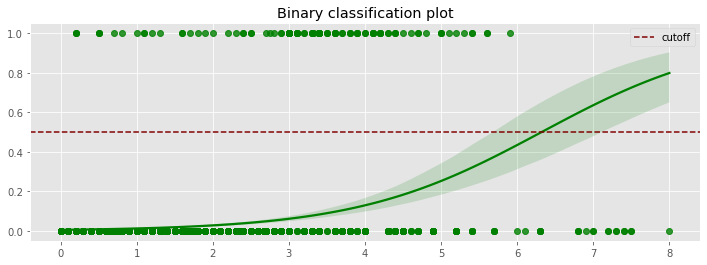

In [34]:
# Show a binary classification plot with each form of personal loan colored in a different color.
plt.figure(figsize = (12,4))
plt.title("Binary classification plot")

xlog = credit2[['CCAvg']].values
ylog = credit2[['Personal Loan']].values

# Use sns.regplot to show the logistic regression curve.
sns.regplot(xlog, ylog, logistic=True, color='green')
plt.axhline(.5, color="maroon", label="cutoff", ls = '--')
plt.legend(loc = 'best')
plt.show()

A binary classification graph closely reflects data points on 0 and 1, and is colored according to the type of personal loan. The x-axis represents a certain age group, which helps convey relevant information. The cutoff, 0.5, is used inside the binary classification plot.

In [35]:
# Import metrics from scikit learn.
from sklearn import metrics
log_acc = metrics.accuracy_score(y_test, predictions)*100
# Print accuracy, precision, recall, and f1 score.
print("Accuracy:",round(metrics.accuracy_score(y_test, predictions)*100,3),"%.")
print("Precision:",round(metrics.precision_score(y_test, predictions)*100,3),"%.")
print("Recall:",round(metrics.recall_score(y_test, predictions)*100,3),"%.")
print("F1 Score:",round(metrics.f1_score(y_test, predictions)*100,3),"%.")

Accuracy: 97.51 %.
Precision: 68.75 %.
Recall: 34.375 %.
F1 Score: 45.833 %.


In [36]:
# Manually computed evaluation metrics such as accuracy, precision, recall, and f1 score.
# Define variables TP,TN,FP, and FN.
TP = 11
TN = 1007
FP = 5
FN = 21
# Compute Accuracy and store to a variable called accuracy.
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('The accuracy is,',round(accuracy,2)*100,"%.")

# Compute Precision and store to a variable called Precision.
Precision = (TP) / (TP+FP)
print('The precision is,',round(Precision,2)*100,"%.")

# Compute Recall and store to a variable called recall.
recall = (TP) / (TP+FN)
print('The recall is,',round(recall,2)*100,"%.")

# Compute F1 score and store to a variable called F1.
F1 = 2 * ((Precision * recall) / (Precision + recall))
print('The F1-score is,',round(F1,2)*100,"%.")

# Compute senstivity and store to a variable called sensti.
sensti = (TP) / (TP + FN)
print('The senstivity is,',round(sensti,2)*100,"%.")

# Compute specificity and store to a variable called specifi.
specifi = (TN) / (TN + FP)
print('The specificity is,',round(specifi,3)*100,"%.")

The accuracy is, 98.0 %.
The precision is, 69.0 %.
The recall is, 34.0 %.
The F1-score is, 46.0 %.
The senstivity is, 34.0 %.
The specificity is, 99.5 %.


Accuracy indicates how close a predicted value is to the true value. Therefore, a logistic model that showed 98% accuracy is quite impressive. I manually computed the sensitivity and specificity as well. The low sensitivity indicates many false negatives. On the other hand, the high specificity shows few false positives.

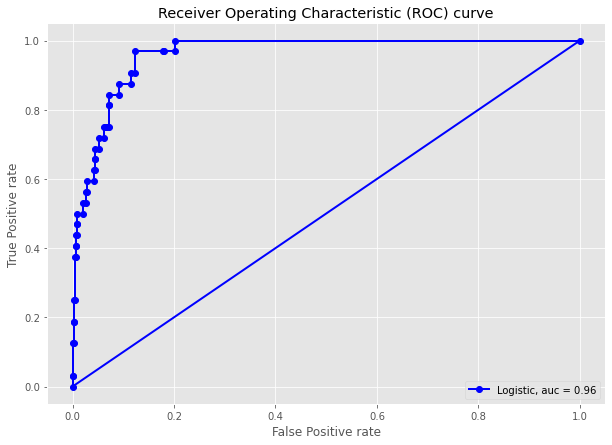

In [37]:
# Plot Receiver Operating Characteristic (ROC) curve.
plt.figure(figsize= (10,7))
# Compute the predicted probability by using a predict_proba() function.
y_pred_prob = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)


# Plot the ROC curve and line join the end points.
plt.plot(fpr,tpr,label="Logistic, auc = {}".format(round(auc,2)), 
         color = "blue",ls ='-',
         marker = 'o',lw = 2)
plt.plot([0,1],[0,1],lw = 2, color = 'blue')

# Define legend and update x and y lables of a ROC curve.
plt.legend(loc=4, bbox_to_anchor = (1,0))
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.show()

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. The area under curve (auc) indicates an excellent discriminatory ability.Higher the AUC value, better the model.

In [38]:
# Check an error rate.
log_err = round(np.mean(y_test != predictions)*100,3)
print("The error rate is",log_err,"%.")

The error rate is 2.49 %.


The error rate indicates the true representation of the actual values against the predicted values. Simply, it means at what proportion the predicted values were wrong. The percentage of the error rate in a logistic model is less than 5%, which isn't a bad sign for the generalization of the outcomes.

# 2. KNN (K-nearest neighbors algorithm)

In [39]:
# Import standard scaler from scikit learn.
from sklearn.preprocessing import StandardScaler

# Create the scaler variable. Scaler is a standard scaler instance.
scaler = StandardScaler()

In [40]:
# Standardize the data.
scaler.fit(credit2.drop('Personal Loan', axis = 1))

StandardScaler()

In [41]:
# Use a scaler.transform() function to transform the data to a standard scale.
scaled_feature = scaler.transform(credit2.drop('Personal Loan', axis = 1))
col = credit2.drop('Personal Loan', axis = 1)

# Create a variable col to look at the standardize columns.
col = col.columns

# Create a standardize version dataframe.
df = pd.DataFrame(scaled_feature, columns = col)
df.head()

Age  Experience    Income    Family     CCAvg  Education  Mortgage  \
0 -1.790757   -1.675166 -0.241788  1.310318  0.098148  -1.143469 -0.425336   
1 -0.044449   -0.106873 -0.742920  0.450862  0.012861  -1.143469 -0.425336   
2 -0.568341   -0.455383 -1.511322 -1.268049 -0.413573  -1.143469 -0.425336   
3 -0.917603   -0.978147  1.462059 -1.268049  1.036303   0.062794 -0.425336   
4 -0.917603   -1.065275 -0.375424  1.310318 -0.413573   0.062794 -0.425336   

   Securities Account  CD Account  Online  CreditCard  
0            2.897809   -0.200209 -1.2224   -0.647891  
1            2.897809   -0.200209 -1.2224   -0.647891  
2           -0.345088   -0.200209 -1.2224   -0.647891  
3           -0.345088   -0.200209 -1.2224   -0.647891  
4           -0.345088   -0.200209 -1.2224    1.543469

In [42]:
# Define X and y variables.
X = df
y = credit2['Personal Loan']

In [43]:
# Split 30% standardize version of the data to the test set. Set a random state equal to 101.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                        test_size=0.3, random_state=101)

In [44]:
# Import KNeighborsClassifier from scikit learn neighbors family.
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Pass an argument number of neighbors to KNeighborsClassifier, give a name to the variable knn.
knn = KNeighborsClassifier(n_neighbors = 1)

In [46]:
# Fit a knn model.
knn.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=1)

In [47]:
# Define a variable pred which stores knn predictions.
pred = knn.predict(X_test1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1012
           1       0.68      0.47      0.56        32

    accuracy                           0.98      1044
   macro avg       0.83      0.73      0.77      1044
weighted avg       0.97      0.98      0.97      1044





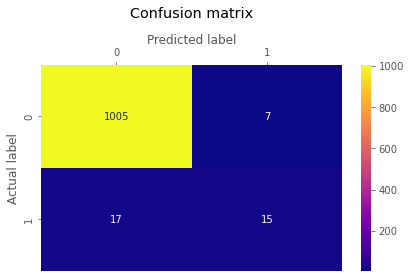

In [48]:
# Show a report on performance evaluation metrics.
# Call a function called classification_report and show the evaluation metrics.
print(classification_report(y_test1, pred))
print('\n')

# Show a confusion matrix on a heatmap.
cnf_matrix = confusion_matrix(y_test1, pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Use a seaborn library and display the confusion matrix on the heatmap.
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="plasma" ,fmt='g')

# Update x-axis and y-axis labels and positions.
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

The classification report showed a good performance using a k-neighbors equal to 1.  The accuracy of a knn model is amazing. Furthermore, precision, recall, and f1 score are significantly improved compared to a logistic model. Furthermore, the confusion matrix misclassified only 24 total values. Without a doubt, the final result is superior to a logistic model.

In [49]:
# Apply an elbow method to choose a correct/optimize k value with elbow method.
error_rate = [] # empty array list

# Check every possible k values from 1 to 50
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train1, y_train1)
    predic = knn.predict(X_test1)
    error_rate.append(np.mean(predic != y_test1))

Text(0, 0.5, 'error rate')

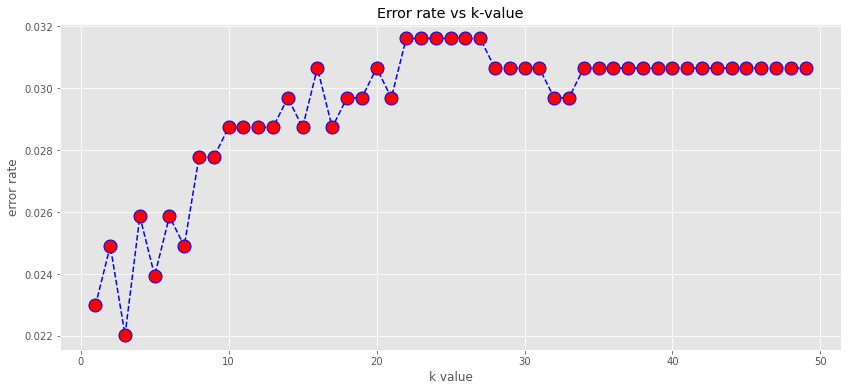

In [50]:
# Plot an error rate.
plt.figure(figsize= (14,6))
plt.plot(range(1,50), error_rate, color = 'blue', ls = '--', marker = 'o', markerfacecolor = 'red',markersize = 13)
plt.title("Error rate vs k-value")
plt.xlabel("k value")
plt.ylabel('error rate')

Thus, after applying an elbow method, as the k value increases,  the error rate also increases. As a result,  more k-neighbors were considered in a model more elements were also taken into account. 

Accuracy: 97.8 .
Precision: 76.47 .
Recall: 40.62 .
F1 Score: 53.06 .
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1012
           1       0.76      0.41      0.53        32

    accuracy                           0.98      1044
   macro avg       0.87      0.70      0.76      1044
weighted avg       0.97      0.98      0.97      1044





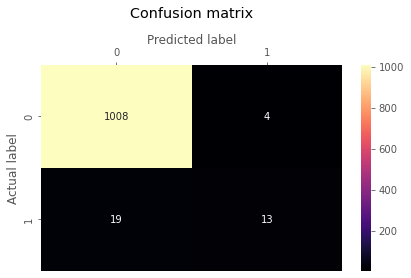

In [51]:
# Use an optimize k-neighbor equal to 3. Repeat the process again.
knn = KNeighborsClassifier (n_neighbors = 3)
knn.fit(X_train1, y_train1)
p = knn.predict(X_test1)
knn_acc = metrics.accuracy_score(y_test1, p)*100
print("Accuracy:",round(metrics.accuracy_score(y_test1, p)*100,2),".")
print("Precision:",round(metrics.precision_score(y_test1, p)*100,2),".")
print("Recall:",round(metrics.recall_score(y_test1, p)*100,2),".")
print("F1 Score:",round(metrics.f1_score(y_test1, p)*100,2),".")

# Show a report on performance evaluation metrics.
# Call a function called classification_report and show the evaluation metrics.
print(classification_report(y_test1, p))
print('\n')

# Show a confusion matrix on a heatmap.
cnf_matrix = confusion_matrix(y_test1, p)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Use a seaborn library and display the confusion matrix on the heatmap.
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="magma" ,fmt='g')

# Update x-axis and y-axis labels and positions.
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

The misclassified values were reduced to 23 with an optimal k-neighbor value. The true positive and true negative numbers have also increased slightly.

In [52]:
# Plot a scatter plot, apply knn algorithm.
fig = px.scatter(
    X_test1, x = 'Income', y = 'CCAvg',
    color = p, color_continuous_scale='sunset',
    symbol=y_test1, symbol_map={'0': '*', '1': 'o'},
    labels={'symbol': 'Personal Loan', 'color': '<b>Score of class</b>'},
    title = "<b>Scatter Plot of Income versus CCAvg using a KNN Algorithm</b>"
) 
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

The KNN Algorithm correctly classified 0 and 1 of personal loans. The numbe 0 indicates the customers who didn't purchase the personal loan. Whereas 1 indicates the customers who purchased the personal loan. The scatter plot depicts the type of personal loan, income,  as well as the customers' average monthly credit card usage.

In [53]:
# Find out the true positive and true negative counts in the target variable.
credit2['Personal Loan'].value_counts()

0    3366
1     111
Name: Personal Loan, dtype: int64

As can be seen, it is imbalanced, which may impact the model's performance.

In [54]:
# Compute an error rate where k = 1
print("The error rate with k-neighbors = 1 is",round(np.mean(y_test1 != pred)*100,3),"%.")

# Compute an error rate where k = 3
knn_err = round(np.mean(y_test1 != p)*100,3)
print("The error rate with k-neighbors = 3 is", knn_err,"%.")

The error rate with k-neighbors = 1 is 2.299 %.
The error rate with k-neighbors = 3 is 2.203 %.


There is no change in the error rate because the accuracy has not changed. The evaluation metrics and misclassified values, on the other hand, had changed.

# 3. Decision Tree Algorithm

In [55]:
# Define X any y variables.
X = credit2.drop('Personal Loan', axis = 1)
y = credit2['Personal Loan']

In [56]:
# Call train_test_split() function to split 30% data to the test set randomly.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, 
                        test_size=0.3, random_state=101)

In [57]:
# Import DecisionTreeClassifier() function from scikit learn tree family.
from sklearn.tree import DecisionTreeClassifier

# Create an instance dtc of DecisionTreeClassifier().
dtc = DecisionTreeClassifier()

In [58]:
# Fit a decision tree model.
dtc.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [59]:
# Predict a decision tree model.
dtc_pred = dtc.predict(X_test2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1012
           1       0.65      0.62      0.63        32

    accuracy                           0.98      1044
   macro avg       0.82      0.81      0.81      1044
weighted avg       0.98      0.98      0.98      1044





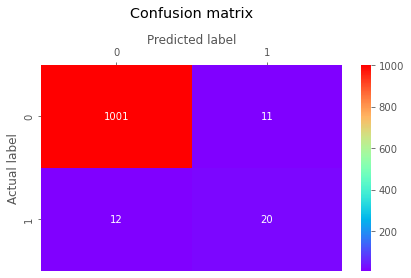

In [60]:
# Showcase the performance evaluation metrics.
print(classification_report(y_test2, dtc_pred))
print('\n')

# Using the sns.heatmap() function, create a Confusion Matrix on the heatmap.
cnf_matrix = confusion_matrix(y_test2, dtc_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="rainbow" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")

plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

The decision tree model reduced the misclassification values to 21 when compared to the k-nearest neighbors algorithm. Other Important evaluation metrics like recall and f1 score have significantly improved. The precision, on the other hand, was reduced by 0.07. The accuracy has not been affected.

In [61]:
# Print accuracy, precision, recall, and f1 score. Round up by 2 decimal places.
decision_acc = metrics.accuracy_score(y_test2, dtc_pred)*100
print("Accuracy:",round(metrics.accuracy_score(y_test2, dtc_pred)*100,2),"%.")
print("Precision:",round(metrics.precision_score(y_test2, dtc_pred)*100,2),"%.")
print("Recall:",round(metrics.recall_score(y_test2, dtc_pred)*100,2),"%.")
print("F1 Score:",round(metrics.f1_score(y_test2, dtc_pred)*100,2),"%.")

Accuracy: 97.8 %.
Precision: 64.52 %.
Recall: 62.5 %.
F1 Score: 63.49 %.


In [62]:
# Calculate the decision tree model's error rate.
decision_err = round(np.mean(y_test2 != dtc_pred)*100,3)
print("The error rate is",decision_err,"%.")

The error rate is 2.203 %.


Compared to the logistic and knn models, the error rate is slightly lower. As a result, the decision tree is the most effective model thus far.

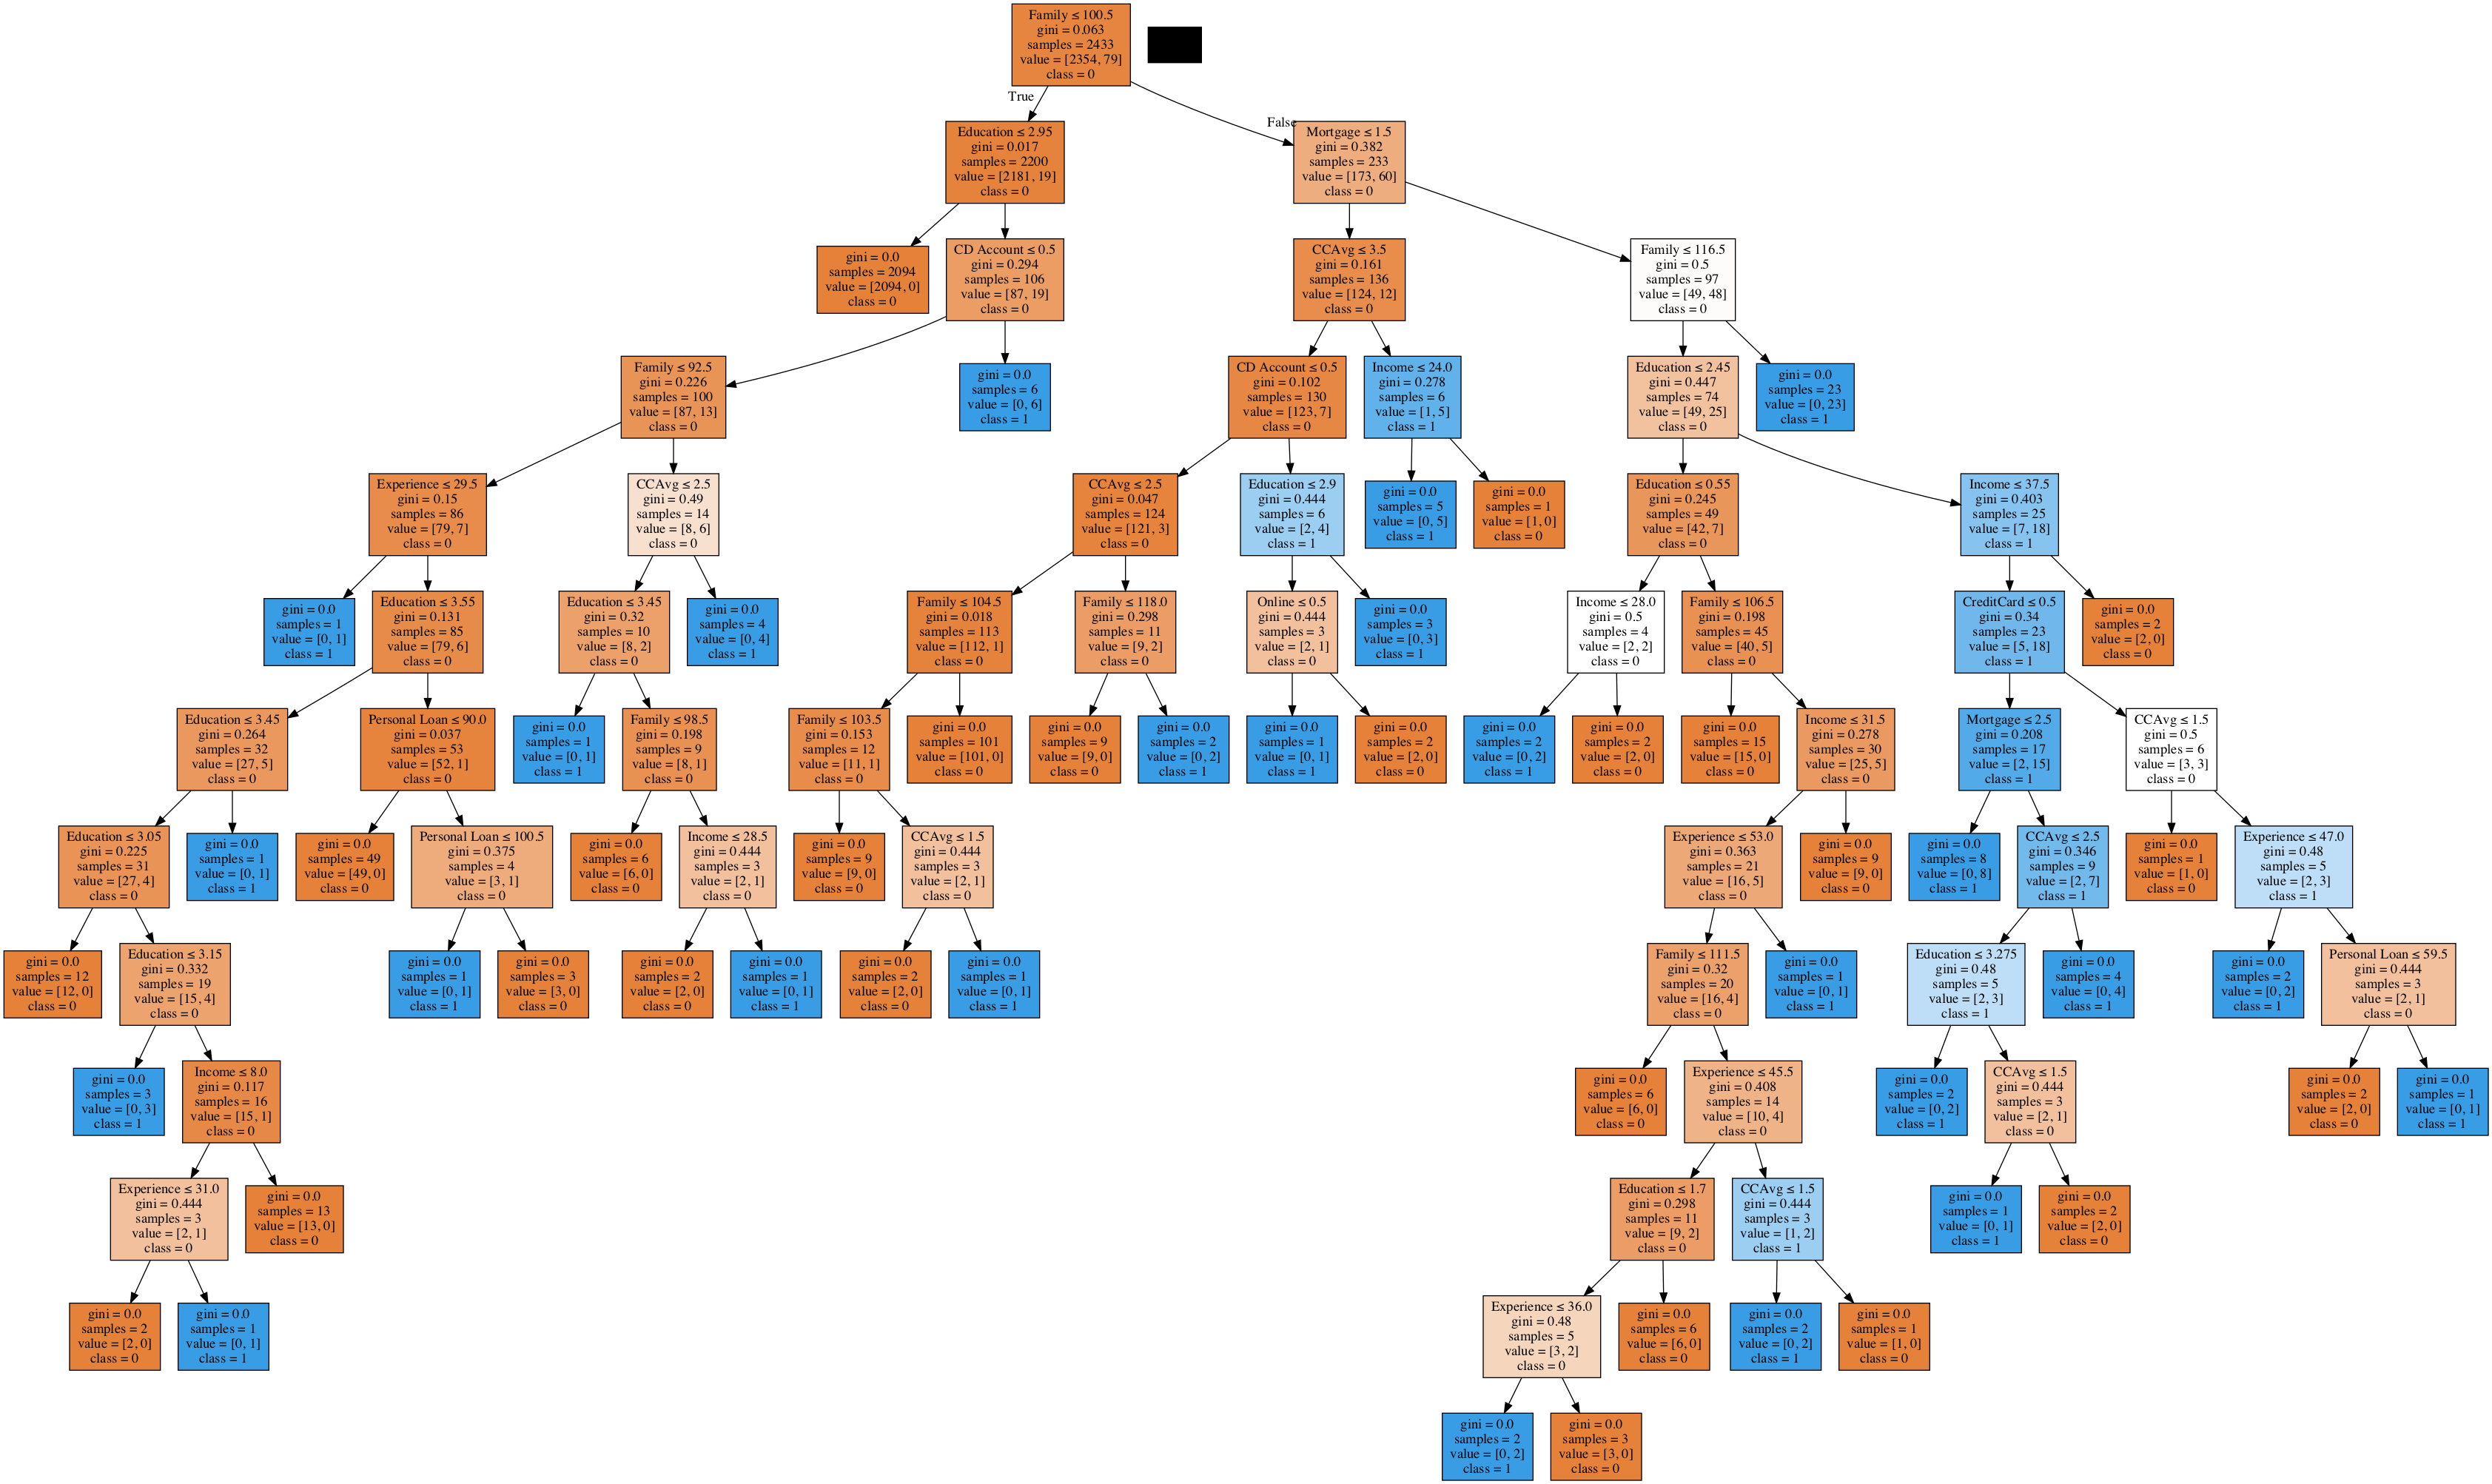

<Figure size 1152x648 with 0 Axes>

In [63]:
# Visualize decision tree model using a export_graphviz and pydotplus libraries.
plt.figure(figsize= (16,9))

features = list(credit2.columns[1:])

dot_data = StringIO()  
export_graphviz(dtc, out_file = dot_data,
                feature_names=features,
                filled=True,rounded=False,
                special_characters=True, 
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())



The decision tree is a very useful tool for making decisions. It has a top-level root node that is a family. There are decision nodes and terminal nodes, which are also known as leaves. A personal loan's data is classified using the decision tree. As a result, it's easy to understand even when you're not a statistician.

# 4. Random Forest Algorithm

In [64]:
# Define X and y variables.
X = credit2.drop('Personal Loan', axis = 1)
y = credit2['Personal Loan']

In [65]:
# Call train_test_split() function to split 30% data to the test set randomly.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, 
                        test_size=0.3, random_state=101)

In [66]:
# Import RandomForestClassifier() function from scikit learn library.
from sklearn.ensemble import RandomForestClassifier

# Create an instance rfc of RandomForestClassifier().
rfc = RandomForestClassifier(n_estimators = 500, random_state= 50)

In [67]:
# Fit a training data to a random forest model.
rfc.fit(X_train3, y_train3)

RandomForestClassifier(n_estimators=500, random_state=50)

In [68]:
# Predict a random forest model.
rfc_pred = rfc.predict(X_test3)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1012
           1       0.83      0.59      0.69        32

    accuracy                           0.98      1044
   macro avg       0.91      0.79      0.84      1044
weighted avg       0.98      0.98      0.98      1044





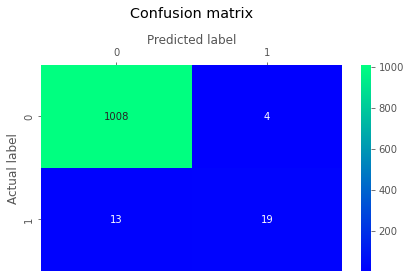

In [69]:
# Show the performance evaluation metrics.
print(classification_report(y_test3, rfc_pred))
print('\n')

# Use a Confusion Matrix() function to display a confusion matrix on the heatmap.
cnf_matrix = confusion_matrix(y_test3, rfc_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="winter" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")

plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

A random forest model is superior to a decision tree model because it has somewhat better precision, misclassified values, and an f1 score. The accuracy, on the other hand, marginally improved.

In [70]:
# Show an accuracy, precision, recall, and f1 score.
random_acc = metrics.accuracy_score(y_test3, rfc_pred)*100
print("Accuracy:",round(metrics.accuracy_score(y_test3, rfc_pred)*100,3),"%.")
print("Precision:",round(metrics.precision_score(y_test3, rfc_pred)*100,3),"%.")
print("Recall:",round(metrics.recall_score(y_test3, rfc_pred)*100,3),"%.")
print("F1 Score:",round(metrics.f1_score(y_test3, rfc_pred)*100,3),"%.")

Accuracy: 98.372 %.
Precision: 82.609 %.
Recall: 59.375 %.
F1 Score: 69.091 %.


In [71]:
# Compute an error_rate of the random forest model.
random_err = round(np.mean(y_test3 != rfc_pred)*100,3)
print("The error rate is",random_err,"%.")

The error rate is 1.628 %.


The rate of error falls by 0.383 %. As a result, the random forest model has truly excelled.

Text(0.5, 1.0, 'Single Decision Tree in Random Forest')

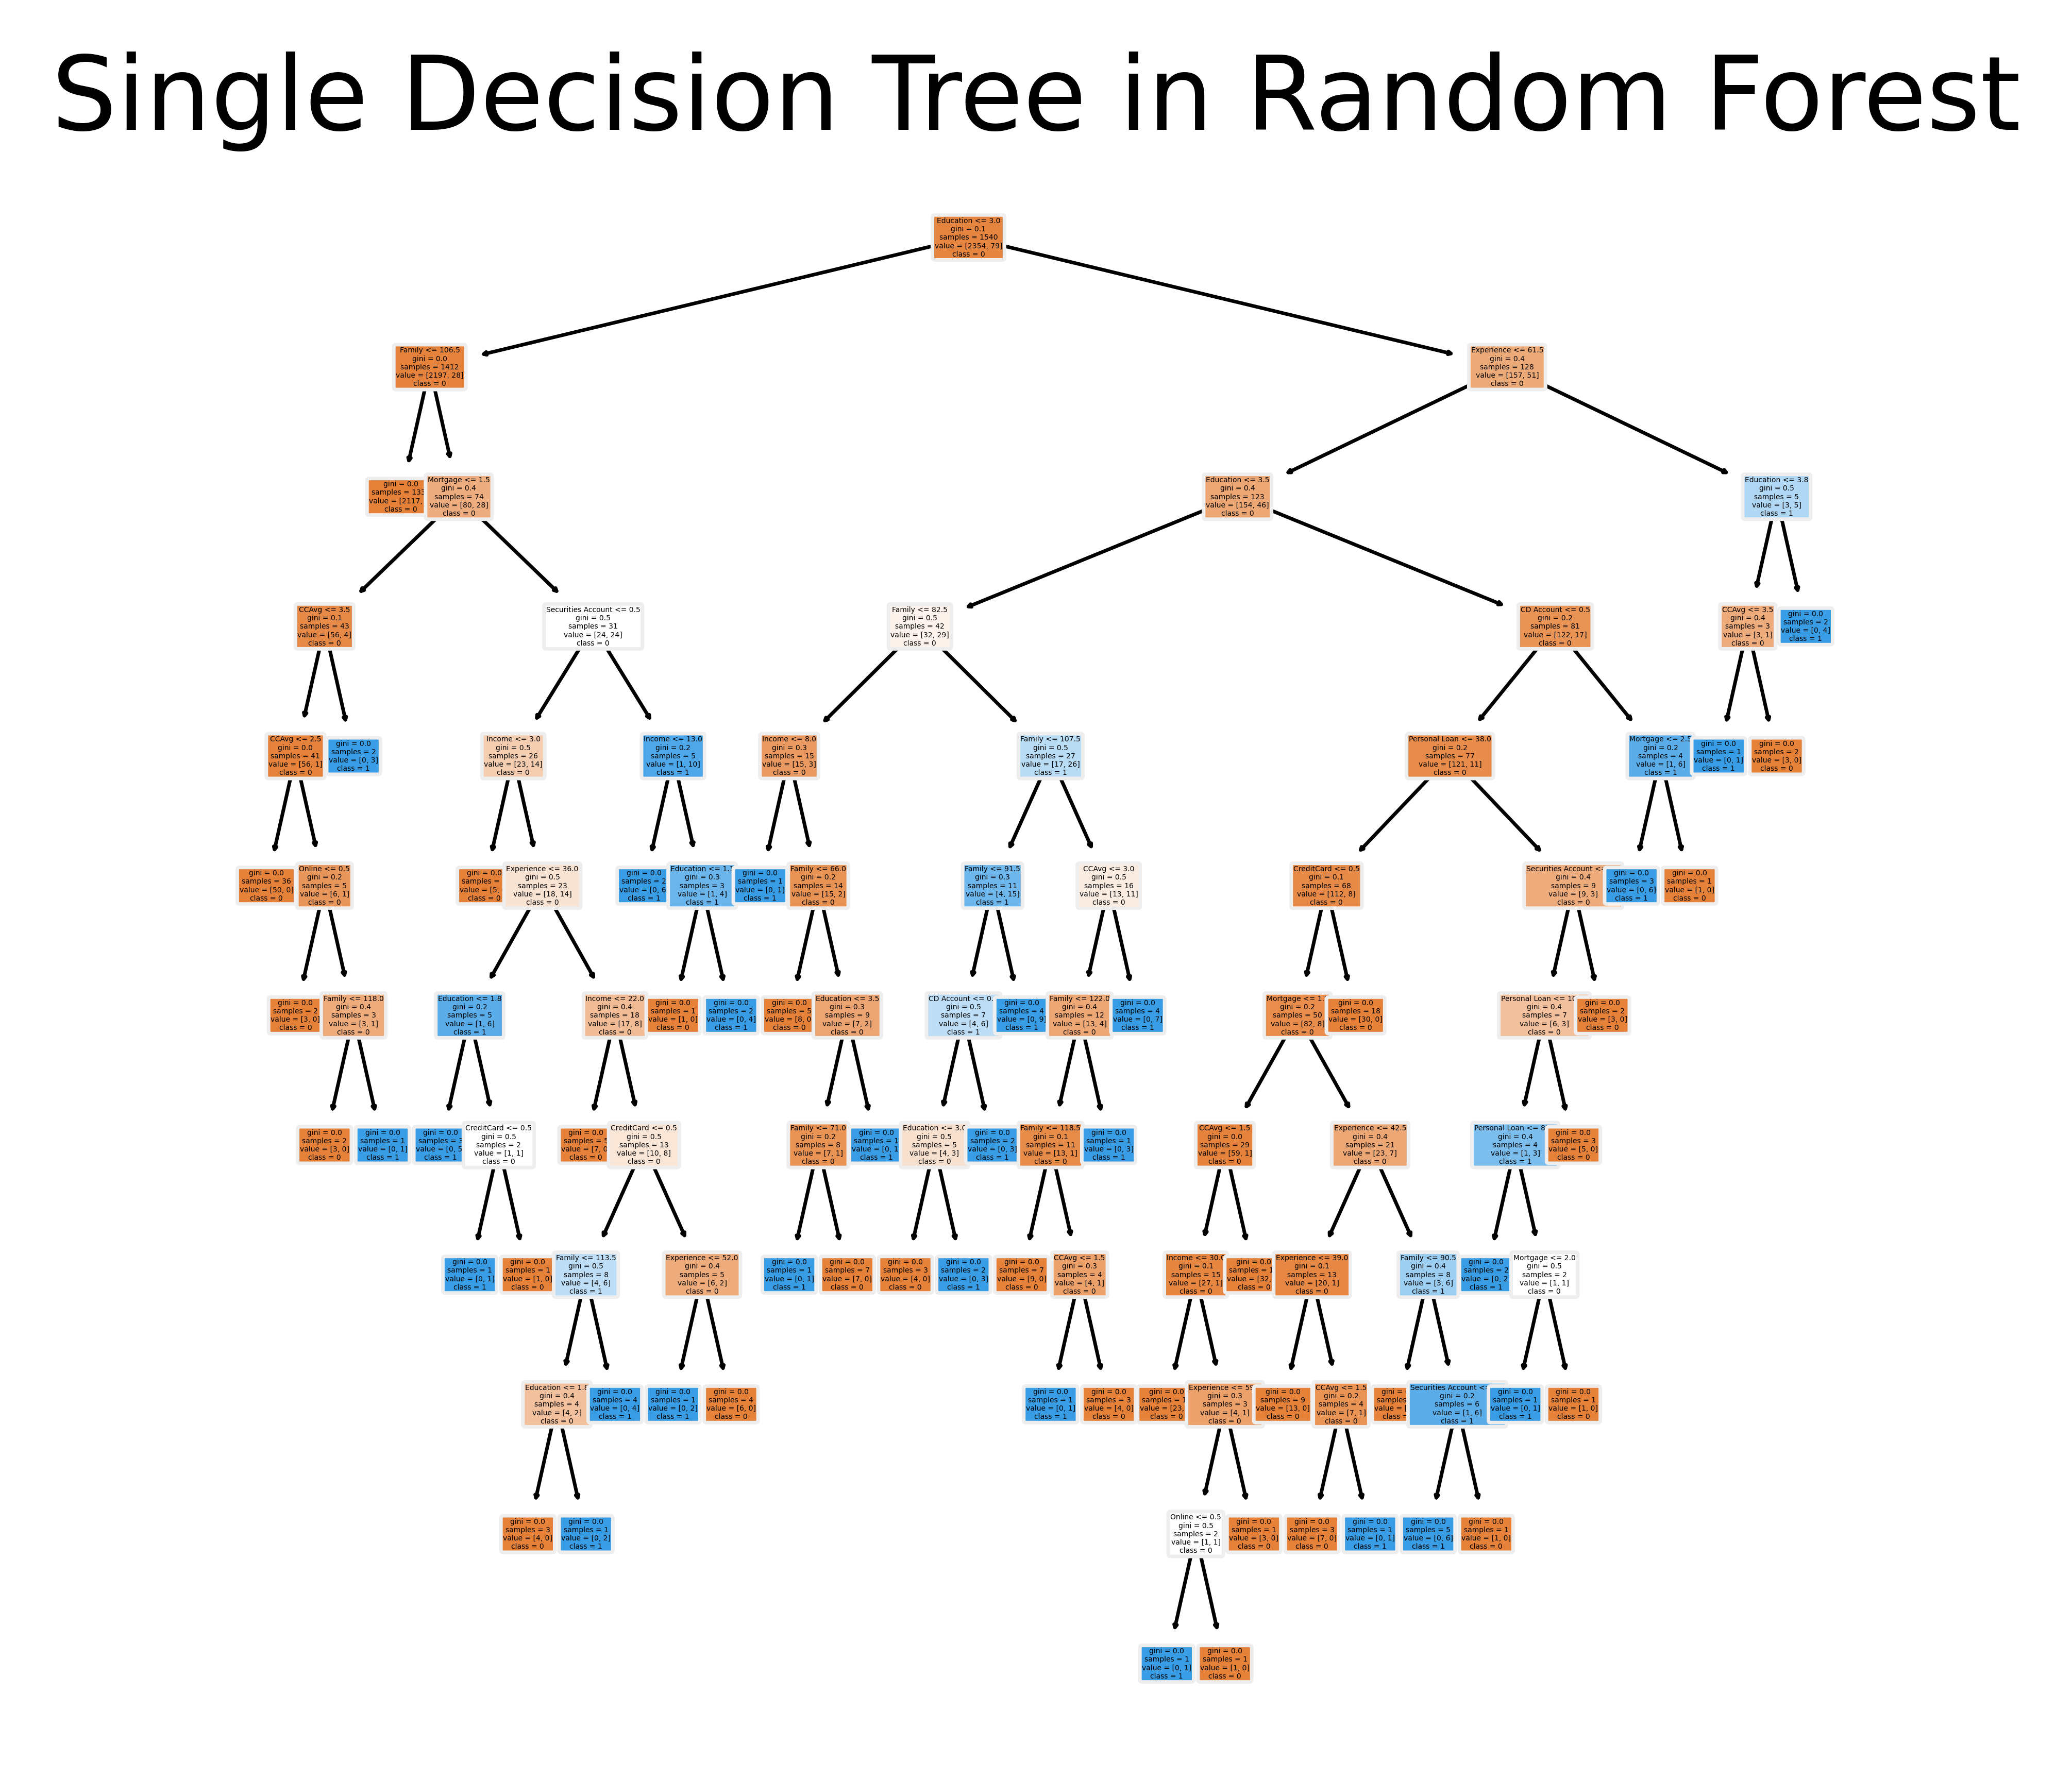

In [72]:
# Visualize a single decision tree in random forest.
features = list(credit2.columns[1:])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(rfc.estimators_[0],
               feature_names = features, 
               class_names=['0','1'],
               filled = True,
              rounded = True,
              precision = 1);

plt.title('Single Decision Tree in Random Forest')

Random forest can build numerous decision trees from a dataset by selecting observations/rows and specific features/variables at random and then averaging the results. It has a root node "family" on the top, and then it has decision nodes and terminal nodes. It is much readable and interpretable than a complex decision tree network.

# 5. Support Vector Machine (SVM) Algorithm

In [73]:
# Import SVC() function from scikit learn library.
from sklearn.svm import SVC

In [74]:
# Define X and y variables.
X = credit2.drop('Personal Loan', axis = 1)
y = credit2['Personal Loan']

# Call train_test_split() function to split 30% data to the test set randomly.
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, 
                        test_size=0.3, random_state=101)

In [75]:
# Create an instance of support vector classifier (SVC).
svm = SVC()

In [76]:
# Fit a training data to the svm model.
svm.fit(X_train4, y_train4)

SVC()

In [77]:
# Use svm.predict() function to predict the model.
svm_pred = svm.predict(X_test4)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1012
           1       0.00      0.00      0.00        32

    accuracy                           0.97      1044
   macro avg       0.48      0.50      0.49      1044
weighted avg       0.94      0.97      0.95      1044





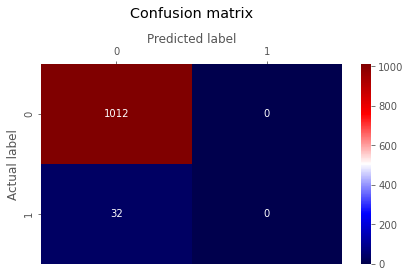

In [78]:
# Show the peformance evaluation metrics of a svm model.
print(classification_report(y_test4, svm_pred))
print('\n')

# Display a Confusion Matrix on the heatmap.
cnf_matrix = confusion_matrix(y_test4, svm_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Use a sns.heatmap() function to visualize the heatmap.
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="seismic" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")

plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

As can be seen, SVM only predicted one type of personal loan.  We must first choose the best C (tuning/regularization parameter) to take both classes into account.


In [79]:
# Import grid search cross validationfrom scikit learn library.
from sklearn.model_selection import GridSearchCV

In [80]:
# Use a grid search cross validation to find the best C and gamma tunning parameters.
param_grid1 = {'C':[0.1,1,10,100,1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(SVC(), param_grid = param_grid1, verbose = 3)
# Higher the verbose number, the more text messages" 

In [81]:
# Fit a model.
grid.fit(X_train4, y_train4)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.2s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.2s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.969 total time=   0.2s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.967 total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.967 total time=   0.2s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.967 total time=   0.2s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.969 total time=   0.2s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.967 total time=   0.2s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.967 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [82]:
# Show the best estimator, the best score, and the best parameter.
print('The best estimator is,',grid.best_estimator_)
print('The best score is,',grid.best_score_)
print('The best parameters are,',grid.best_params_)

The best estimator is, SVC(C=1000, gamma=0.001)
The best score is, 0.9769826180275645
The best parameters are, {'C': 1000, 'gamma': 0.001}


In [83]:
# Define a variable called svm_pred1, predict a model.
svm_pred1 = grid.predict(X_test4)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1012
           1       0.70      0.59      0.64        32

    accuracy                           0.98      1044
   macro avg       0.85      0.79      0.82      1044
weighted avg       0.98      0.98      0.98      1044





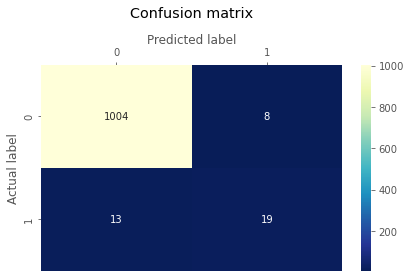

In [84]:
# Show the classification matrix and confusion matrix.
print(classification_report(y_test4, svm_pred1))
print('\n')

# Show the Confusion Matrix.
cnf_matrix = confusion_matrix(y_test4, svm_pred1)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Use sns.heatmap() function to display the confusion matriix on the heatmap.
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="YlGnBu_r" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")

plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

The model correctly predicted both classes of personal loans using the grid search cross-validation approach. Although I used the optimal c and gamma tuning parameters, it is not nearly as spectacular as the random forest.

In [85]:
# Show an accuracy, precision, recall, and f1 score.
svm_acc = metrics.accuracy_score(y_test4, svm_pred1)*100
print("Accuracy:",round(metrics.accuracy_score(y_test4, svm_pred1)*100,3),"%.")
print("Precision:",round(metrics.precision_score(y_test4, svm_pred1)*100,3),"%.")
print("Recall:",round(metrics.recall_score(y_test4, svm_pred1)*100,3),"%.")
print("F1 Score:",round(metrics.f1_score(y_test4, svm_pred1)*100,3),"%.")

Accuracy: 97.989 %.
Precision: 70.37 %.
Recall: 59.375 %.
F1 Score: 64.407 %.


In [86]:
# Compute an error_rate of the support vector machine (SVM) model.
svm_err = round(np.mean(y_test4 != svm_pred1)*100,3)
print("The error rate is",svm_err,"%.")

The error rate is 2.011 %.


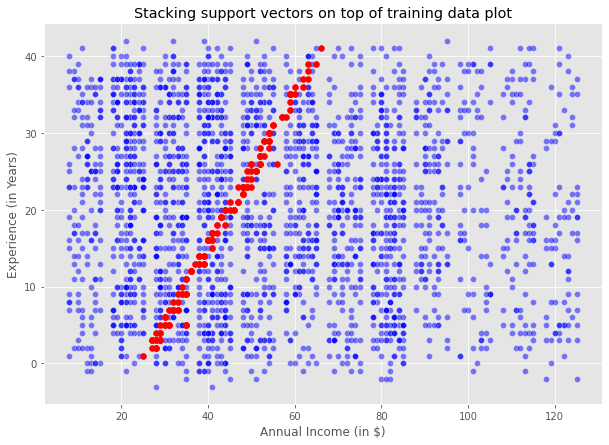

In [87]:
# Visualize the support vector classifier (SVC) using optimal support vectors tuning parameters.
# Show splitting the training data.
plt.figure(figsize = (10,7))
svm1 = SVC(C=1000, gamma= 0.001)
svm1 = svm1.fit(X_train4, y_train4)
support_vectors = svm1.support_vectors_
sns.scatterplot(x = X_train4.iloc[:,2], y = X_train4.iloc[:,1], alpha = 0.5,
            color = "blue")
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Stacking support vectors on top of training data plot')
plt.xlabel('Annual Income (in $)')
plt.ylabel('Experience (in Years)')
plt.show()

We can display the support vectors and the training set by simply using the Matplotlib library to visualize the training data and stacking the support vectors on top.

# 6. Artificial Neural Network (ANN)

Training the Artificial Neural Network (ANN) / deep learning neural network with Stochastic Gradient Descent.

In [88]:
# Define X and y variables
X = credit2.drop('Personal Loan', axis  = 1).values
y = credit2['Personal Loan'].values

In [89]:
# Call train_test_split() function to split 30% data to the test set randomly. 
X_train5, X_test5, y_train5, y_test5 = train_test_split(
     X, y, test_size = 0.3, random_state=101)

In [90]:
# Import a MinMaxScaler from sckit learn library.
from sklearn.preprocessing import MinMaxScaler

In [91]:
# Create an instance scaler of MinMaxScaler().
scaler = MinMaxScaler()

In [92]:
# Transform the data using MinMaxScaler instance.
X_train5 = scaler.fit_transform(X_train5)
X_test5 = scaler.fit_transform(X_test5)

In [93]:
# Import Sequential from tensorflow and keras libraries.
from tensorflow.keras.models import Sequential

# Import Dense from tensorflow and keras libraries.
from tensorflow.keras.layers import Dense

In [94]:
# Create an artificial neural network model.
model = Sequential()

# Add an input and the first hidden layer to the model.
# Use rectified linear unit (relu) an activation function.
# Input dim tells us the number of nodes in the Input Layer.
model.add(Dense(units = 30,input_dim = 11, activation='relu'))# 30 neurons

# Add a second hidden layer to the model.
model.add(Dense(units = 15,activation='relu'))


# Add an output layer to the model.
model.add(Dense(units = 1 ,activation='sigmoid')) 
# I used sigmoid because it is a binary classification problem.

# Compile the Artificial neural network (ANN) model.
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [95]:
# Fit a training data to the Artificial neural network (ANN) model.
# 600 epochs means training the neural network with all the training data for 600 cycle.
model.fit(x = X_train5, y = y_train5, epochs = 600, 
          validation_data = (X_test5, y_test5))

Train on 2433 samples, validate on 1044 samples
Epoch 1/600


2021-12-29 07:13:05.381597: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


2433/2433 [==============================] - 0s 148us/step - loss: 0.3318 - acc: 0.9277 - val_loss: 0.1709 - val_acc: 0.9693
Epoch 2/600
2433/2433 [==============================] - 0s 34us/step - loss: 0.1630 - acc: 0.9675 - val_loss: 0.1564 - val_acc: 0.9693
Epoch 3/600
2433/2433 [==============================] - 0s 34us/step - loss: 0.1531 - acc: 0.9675 - val_loss: 0.1481 - val_acc: 0.9693
Epoch 4/600
2433/2433 [==============================] - 0s 34us/step - loss: 0.1431 - acc: 0.9675 - val_loss: 0.1380 - val_acc: 0.9693
Epoch 5/600
2433/2433 [==============================] - 0s 35us/step - loss: 0.1315 - acc: 0.9675 - val_loss: 0.1272 - val_acc: 0.9693
Epoch 6/600
2433/2433 [==============================] - 0s 33us/step - loss: 0.1187 - acc: 0.9675 - val_loss: 0.1143 - val_acc: 0.9693
Epoch 7/600
2433/2433 [==============================] - 0s 34us/step - loss: 0.1049 - acc: 0.9675 - val_loss: 0.1022 - val_acc: 0.9693
Epoch 8/600
2433/2433 [==============================] - 0s

In [96]:
# Create a dataframe of losses and accuracy before evaluating the performance on the test set.
losses = pd.DataFrame(model.history.history)
# Use a head() function to extract first five rows.
losses.head()

val_loss   val_acc      loss       acc
0  0.170950  0.969349  0.331825  0.927661
1  0.156419  0.969349  0.163006  0.967530
2  0.148114  0.969349  0.153121  0.967530
3  0.137990  0.969349  0.143119  0.967530
4  0.127231  0.969349  0.131465  0.967530

<AxesSubplot:title={'center':'Validation acc & loss and training acc & loss plot'}>

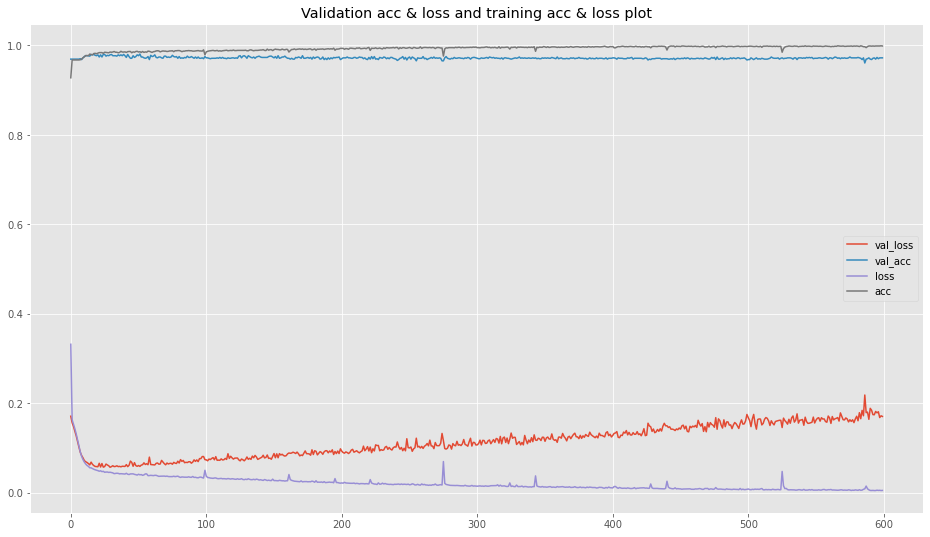

In [97]:
# Visualize an accuracy and loss on the plot.
losses.plot(figsize = (16,9), title = "Validation acc & loss and training acc & loss plot")

The true depiction of running an artificial neural network (ANN) model is shown in the validation accuracy & loss and training accuracy & loss plot. Since the training and validation losses have dropped, this is a positive sign for model evaluation.

In [98]:
# Evaluate the artificial neural network model on the test dataset.
new_pred = model.predict_classes(X_test5)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1012
           1       0.54      0.59      0.57        32

    accuracy                           0.97      1044
   macro avg       0.76      0.79      0.78      1044
weighted avg       0.97      0.97      0.97      1044





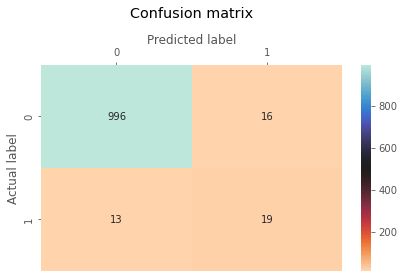

In [99]:
# Show the classification matrix and confusion matrix.
print(classification_report(y_test5, new_pred))
print('\n')

# Show the Confusion Matrix.
cnf_matrix = confusion_matrix(y_test5, new_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Use sns.heatmap() function to display the confusion matriix on the heatmap.
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, 
            cmap="icefire_r" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")

plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

After carefully analyzing the classification report and the confusion matrix, an artificial neural network is not as remarkable as the random forest. Also, it revealed a large number of misclassified values which makes it an inferior model in comparison to other supervised machine learning models.

In [100]:
# Show an accuracy, precision, recall, and f1 score.
ann_acc = metrics.accuracy_score(y_test5, new_pred)*100
print("Accuracy:",round(metrics.accuracy_score(y_test5, new_pred)*100,3),"%.")
print("Precision:",round(metrics.precision_score(y_test5, new_pred)*100,3),"%.")
print("Recall:",round(metrics.recall_score(y_test5, new_pred)*100,3),"%.")
print("F1 Score:",round(metrics.f1_score(y_test5, new_pred)*100,3),"%.")

Accuracy: 97.222 %.
Precision: 54.286 %.
Recall: 59.375 %.
F1 Score: 56.716 %.


In [101]:
# Compute an error_rate of the artificial neural network.
ann_err = round(np.mean(y_test5 != new_pred)*100,3)
print("The error rate is",ann_err,"%.")

The error rate is 6.212 %.


In contrast to all other models, the artificial neural network had an extremely high error rate. This is not something the retail marketing department should utilize.

In [102]:
# Create a dictionary which takes all the supervised machine learning algorithms.
dat = {'Logistic': [log_acc, log_err], 'KNN':[knn_acc, knn_err], 
                     'Decision Tree':[decision_acc, decision_err], 
                     'Random Forest':[random_acc, random_err],
                    'SVM':[svm_acc, svm_err],'ANN':[ann_acc, ann_err]}

# Create a new dataframe to show algorithms.
datframe = pd.DataFrame(dat, index=['Accuracy', 'Error'])
datframe


Logistic        KNN  Decision Tree  Random Forest        SVM  \
Accuracy  97.509579  97.796935      97.796935      98.371648  97.988506   
Error      2.490000   2.203000       2.203000       1.628000   2.011000   

                ANN  
Accuracy  97.222222  
Error      6.212000

I showed a summary table about the accuracy and errors of the deployed machine learning algorithms in this project. As shown above random forest is the best machine learning algorithim.

# Conclusion

After a thorough investigation, feature engineering, and exploration of the dataset variables, some of the most prominent supervised machine learning algorithms were deployed in this project. The objective of utilizing these advanced algorithms was to find the optimum algorithm for assisting the retail marketing department in identifying potential customers who are more likely to buy the loan. As a result, after testing the most sophisticated algorithms, I discovered that the random forest algorithm is the best fit for this dataset. The bank should apply the random forest algorithm, which will assist the bank's retail marketing department in cutting campaign costs. Last but not least, the random forest accurately predicted whether potential consumers would accept or refuse a personal loan in future campaigns.